In [2]:
%matplotlib inline
import time
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
rating_file_path = "../data/ml-1m/ratings.dat"
movie_file_path = "../data/ml-1m/movies.dat"
user_file_path = "../data/ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, 
                                     names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', encoding_errors='ignore')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::', encoding_errors='ignore')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding_errors='ignore')

In [4]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
'''null값확인'''
print(rating_data.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64


In [8]:
print(movie_data.isnull().sum())

movie_id    0
title       0
genre       0
dtype: int64


In [9]:
print(user_data.isnull().sum())

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


In [10]:
'''총 영화 갯수'''
print(len(movie_data['movie_id'].unique()))

3883


In [11]:
'''movie_data 에서 title(year)의 값에서 year 값만 뽑아서
연도별 영화 갯구가 많은 top10 년도 뽑기'''

movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data.head()


,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [13]:
'''연대별 (10년단위) 영화갯수 출력'''
movie_data['decade'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
movie_data

,movie_id,title,genre,year,decade
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [14]:
decade_counts = movie_data['decade'].value_counts().sort_index().reset_index()
decade_counts.columns = ['decade', 'count']

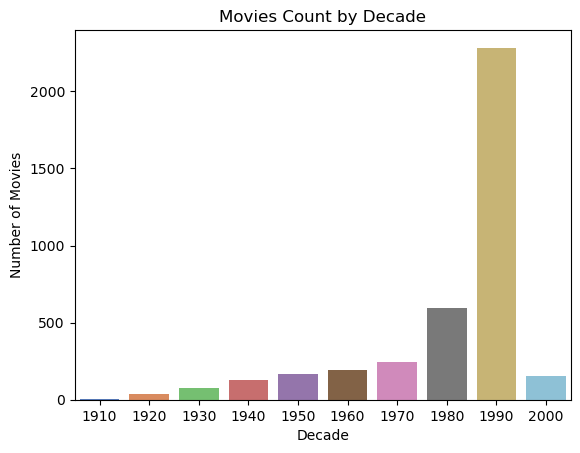

In [40]:
#plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='count', data=decade_counts, palette='muted')
plt.title('Movies Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

In [15]:
'''가장 많이 사용된 장르뽑기'''
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

In [16]:
'''가장 많이 등장한 장르 속성 : | 으로 구분선 분리'''
unique_genre_dict = {}
def process_genre(row):
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")
    
    for genre in parsed_genre:
        unique_genre_dict[genre] = unique_genre_dict.get(genre, 0) + 1

# apply 함수를 사용하여 각 행에 대해 process_genre 함수 적용
movie_data.apply(process_genre, axis=1)

# 결과 출력
print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


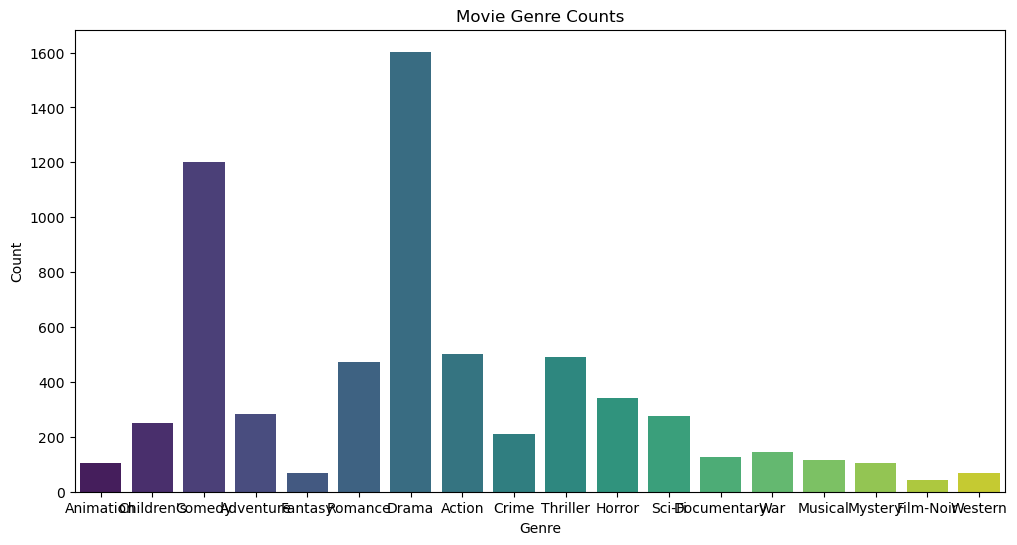

In [17]:
genre_counts = pd.DataFrame(list(unique_genre_dict.items()), columns=['Genre', 'Count'])

# seaborn을 사용하여 바 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.title('Movie Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [18]:
'''user 의 수 '''
len(user_data['user_id'].unique())

6040

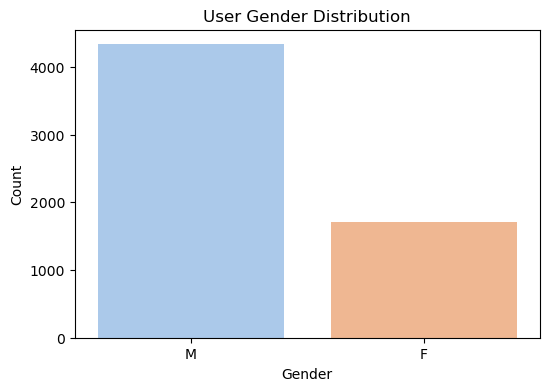

In [19]:
'''user 성별 탐색'''
user_gender = user_data['gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=user_gender.index, y=user_gender.values, palette='pastel')
plt.title('User Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [20]:
'''User 연령대'''
user_data['age'].value_counts()
print(type(user_data))

<class 'pandas.core.frame.DataFrame'>


In [21]:
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"

user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()

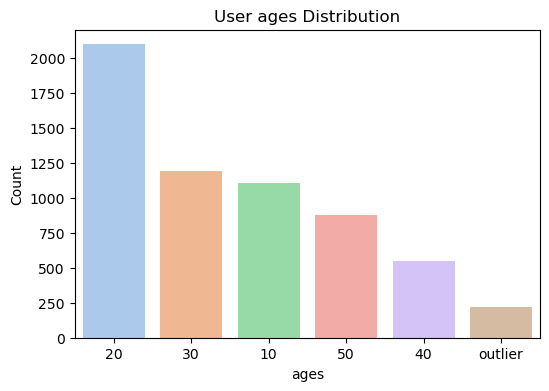

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x=user_ages.index, y=user_ages.values, palette='pastel')
plt.title('User ages Distribution')
plt.xlabel('ages')
plt.ylabel('Count')
plt.show()

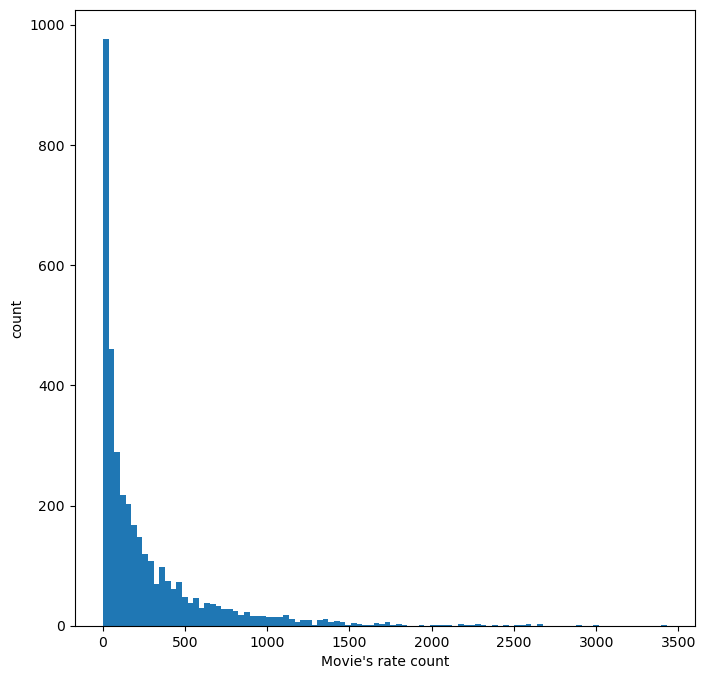

In [23]:
# 영화별 평가횟수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize']=[8,8]
plt.hist(movie_rate_count, bins=100)
plt.ylabel('count',fontsize=10)
plt.xlabel("Movie's rate count")
plt.show()

In [24]:
# 영화별 평균 평점(group by)
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

In [25]:
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


<Axes: >

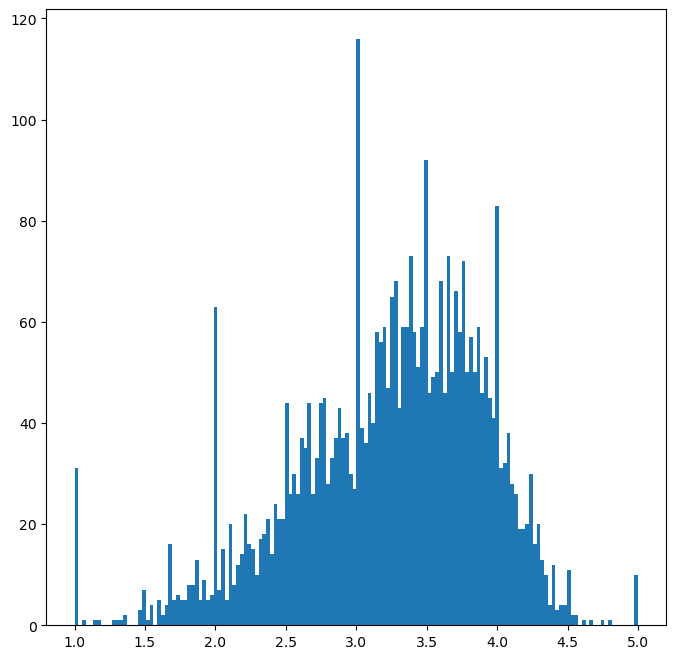

In [26]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [ ]:
'''100번 이상의 평가를 받은 영화 중 평점이 높은 영화 10개 출력'''


In [27]:
movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')


,movie_id,rated_count,rating_mean,title,genre,year,decade
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000
3703,3950,54,3.666667,Tigerland (2000),Drama,2000,2000
3704,3951,40,3.900000,Two Family House (2000),Drama,2000,2000


In [29]:
merged_data=movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


In [30]:
''' 유저별 영화 평가 탐색'''
rating_data.groupby('user_id')['rating'].agg(['count','mean','std'])


,count,mean,std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699
...,...,...,...
6036,888,3.302928,1.023684
6037,202,3.717822,0.877910
6038,20,3.800000,1.105013


In [38]:
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean','std'])
user_grouped_rating_info.colums =['rating_count', 'rating_mean','rating_std']

In [41]:
user_grouped_rating_info.head()

,count,mean,std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


Text(0, 0.5, 'Frequency')

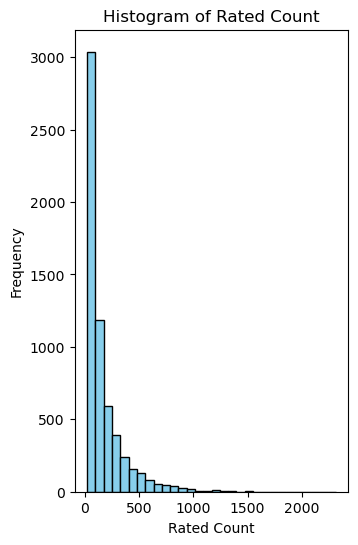

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(user_grouped_rating_info['count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Rated Count')
plt.xlabel('Rated Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

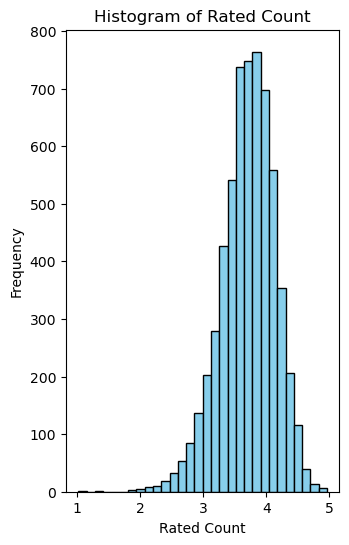

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(user_grouped_rating_info['mean'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Rated Count')
plt.xlabel('Rated Count')
plt.ylabel('Frequency')

<Axes: >

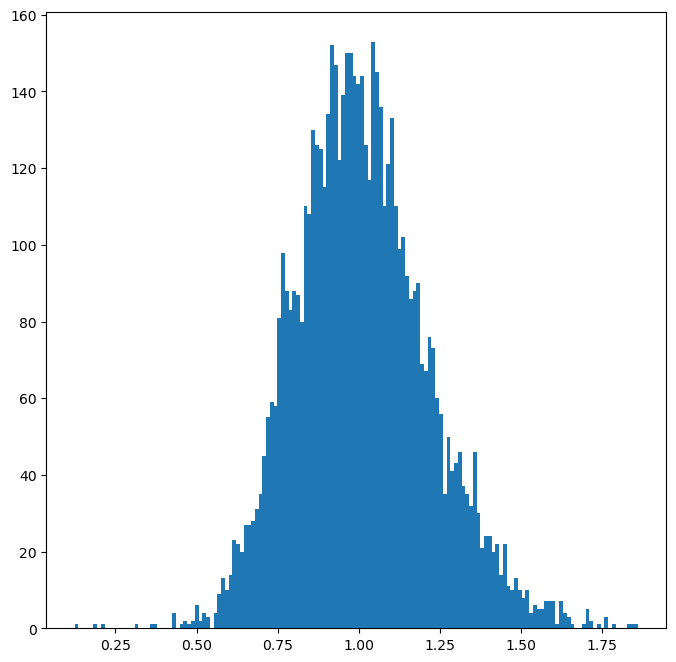

In [45]:
user_grouped_rating_info['std'].hist(bins=150, grid=False)